In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

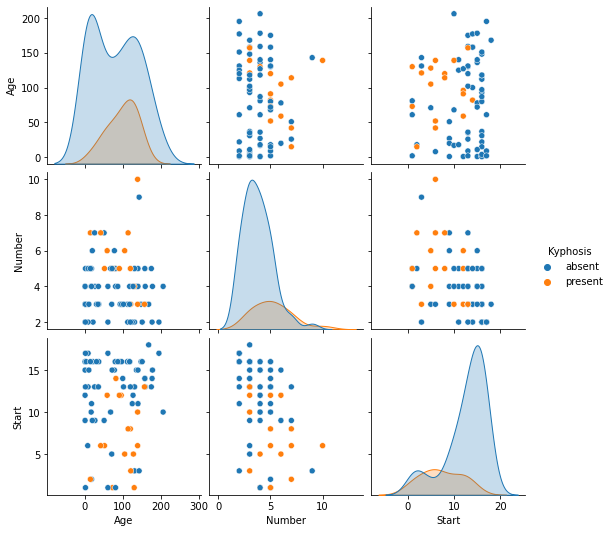

In [7]:
sns.pairplot(df, hue = 'Kyphosis')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis', axis = 1)

In [10]:
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
predict = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[12  5]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators=200)

In [20]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


In [23]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [24]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

The data is already labeled unbalanced

the random forest model did only a little better than a single decision tree because the dataset isn't that big, and it's unbalanced.

In [25]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [26]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [27]:
conda install -c conda-forge python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\naamale\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_4         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_4




conda-4.10.3         | 3.1 MB    |            |   0% 
conda-4.10.3         | 3.1 MB    |            |   1% 
conda-4.10.3         | 3.1 MB    | 3          |   4% 
conda-4.10.3         | 3.1 MB    | 8          |   9% 
conda-4.

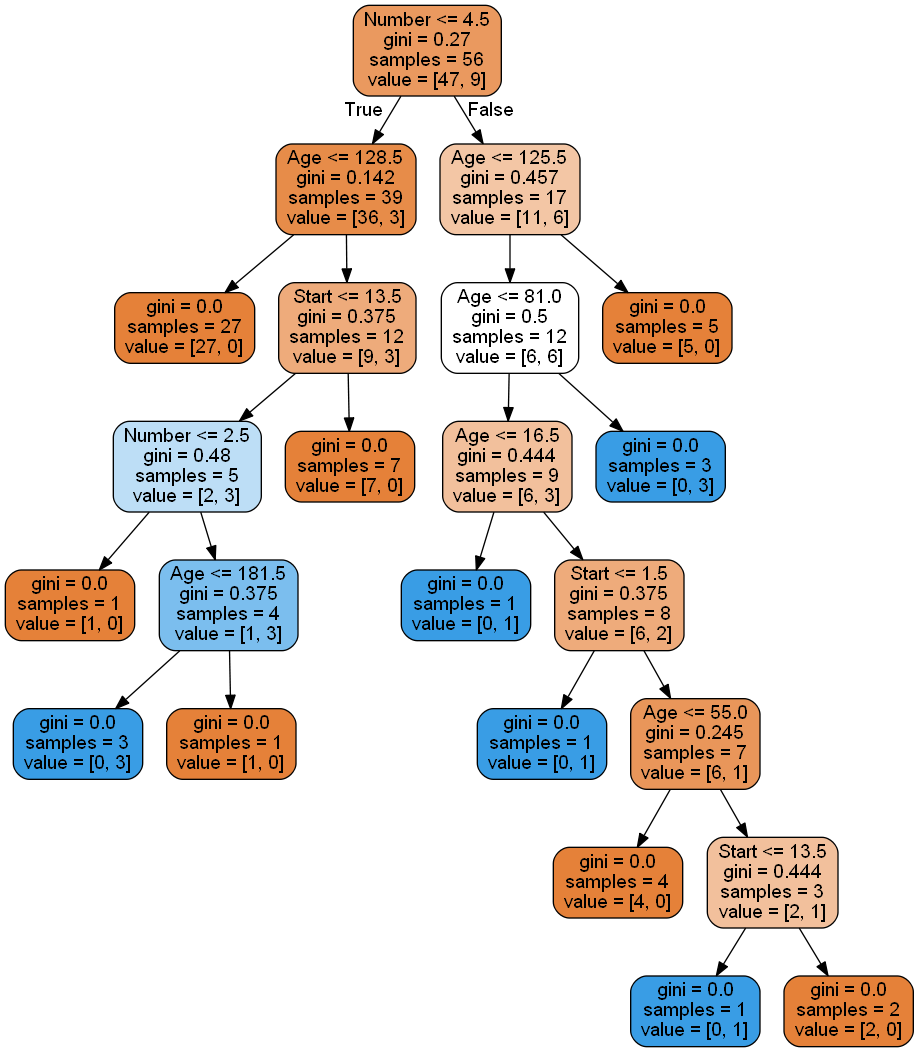

In [28]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [29]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\naamale\Anaconda3

  added / updated specs:
    - conda


The following packages will be REMOVED:

  python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.10.3-py38haa244f~ --> pkgs/main::conda-4.10.3-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [30]:
X_test.head()

,Age,Number,Start
33,112,3,16
61,114,7,8
21,105,6,5
32,130,5,13
20,22,2,16


In [32]:
dtree.predict([[154, 7, 13]])

array(['absent'], dtype=object)

In [33]:
test = pd.Series(data = {'Age': 154, 'Number': 7, 'Start': 16})

In [34]:
X_test

,Age,Number,Start
33,112,3,16
61,114,7,8
21,105,6,5
32,130,5,13
20,22,2,16
13,1,4,12
52,139,10,6
25,9,5,13
22,96,3,12
27,100,3,14
